In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import math
from math import pi

from sklearn.preprocessing import StandardScaler, OneHotEncoder,LabelEncoder
from sklearn import preprocessing
from sklearn import cluster, metrics
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score


from sklearn.neighbors import NearestNeighbors

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import string
import re 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from textblob import TextBlob


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import accuracy_score, precision_score, recall_score

import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


### Fonctions

In [2]:
def text_clean(df) :
        
    # Minuscule    
    df["Description_clean"] = df["description"].apply(lambda x: x.lower())
    
    # Ponctuation
    df["Description_clean"] = [re.sub(r'[^\w\s]','',elt) for elt in df["Description_clean"]]
    
    # Tokenisation
    df["Description_clean"] = df["Description_clean"].apply(lambda x: word_tokenize(x))
    
    # Stop Words
    sw_liste = []

    for liste in df["Description_clean"]:
        sous_liste = []
        for mot in liste:
            if mot not in stopwords.words("english"):
                sous_liste.append(mot)
        sw_liste.append(sous_liste)
    
    df["Description_clean"] = sw_liste
        
    # Lemmatization
    wordnet = WordNetLemmatizer()

    lm_liste = []

    for liste in data["Description_clean"] :
        sous_liste = []
        for mot in liste :
            sous_liste.append(wordnet.lemmatize(mot))
        lm_liste.append(sous_liste) 

    df["Description_clean"] = lm_liste


def get_top_n_words(x,n):
    
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words= bow.sum(axis = 0)
    
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

    return words_freq[:n]

def plot_n_words(x,n):
    
    vec = CountVectorizer().fit(x)
    bow = vec.transform(x)
    sum_words= bow.sum(axis = 0)
    
    words_freq = [(word, sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    words_freq[:n]
    
    df = pd.DataFrame(words_freq[:n], columns = ['Unigram','Frequency'])
    
    return df.plot(kind='bar', x='Unigram')
    

# Fonctions pour le K_Means

def plot_km(data, k):
    
    fig = plt.figure(figsize=(15,8))

    cls = cluster.KMeans(n_clusters=1)
    cls.fit(data)
    
    
    ax = fig.add_subplot(121) # Figure cote à cote 1
    plt.title('Répartition des données avant le KMeans')
    ax_1  = sns.scatterplot(x = data[:,0], y = data[:,1], hue = cls.labels_)

    cls = cluster.KMeans(n_clusters=k)
    cls.fit(data)
    
    global label
    label = cls.labels_
    
    ax = fig.add_subplot(122) # Figure cote à cote 2
    plt.title('Répartition des données après le KMeans en {}'.format(k))
    ax_2  = sns.scatterplot(x = data[:,0], y = data[:,1], hue = cls.labels_)
        
    
    return ax_2

### Préparation du Dataset

In [3]:
data = pd.read_csv("projet_6")

In [4]:
data.shape

(1050, 15)

In [5]:
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


### NaN

In [6]:
data.isnull().sum()

uniq_id                      0
crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

In [7]:
cat = data.select_dtypes(["bool","object"])
num = data.select_dtypes(["float"])

for col in cat :
    data[col] = data[col].fillna("Missing")
    
for col in num :
    data[col] = data[col].fillna(data[col].mean())
    

In [8]:
data.isnull().sum()

uniq_id                    0
crawl_timestamp            0
product_url                0
product_name               0
product_category_tree      0
pid                        0
retail_price               0
discounted_price           0
image                      0
is_FK_Advantage_product    0
description                0
product_rating             0
overall_rating             0
brand                      0
product_specifications     0
dtype: int64

### Pré-traitement de colonne Description

In [9]:
text_clean(data)

In [10]:
data.head(5)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...","[specification, sathiyas, cotton, bath, towel,..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.000000,1299.000000,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.000000,698.000000,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...","[key, feature, jaipur, print, cotton, floral, ..."


### Transformation des sous listes en STR

In [11]:
new = []
for liste in data["Description_clean"]:
    new.append(' '.join(liste))

data["Description_clean"] = new

In [12]:
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key feature eurospa cotton terry face towel se...


In [13]:
data["Description_clean"][0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 price r 899 curtain enhances look interiorsthis curtain made 100 high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain 213 cm height pack 2 general brand elegance designed door type eyelet model name abstract polyester door curtain set 2 model id duster25 color multicolor dim

### Nuage de mots colonne Description initiale

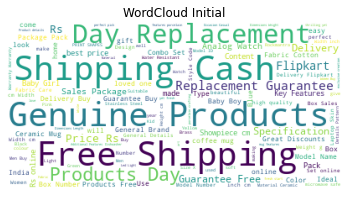

In [14]:
wordcloud = WordCloud(background_color = 'white', max_words = 200).generate(' '.join(data["description"]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud Initial")
plt.show()

### Nuage de mots colonne Description pré-traitée

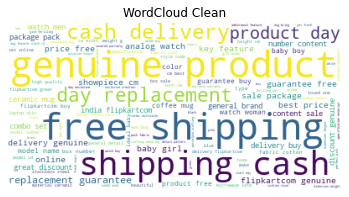

In [15]:
wordcloud = WordCloud(background_color = 'white', max_words = 200).generate(' '.join(data["Description_clean"]))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("WordCloud Clean")
plt.show()

### Réduction de la colonne catégorie au premier élément

In [16]:
data["product_category_tree"].iloc[0]

'["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]'

In [17]:
data["product_category_tree"].iloc[0].split('>>')[0].replace('"','').replace('[','')[:-1]

'Home Furnishing'

In [18]:
cat = []

for elt in data["product_category_tree"]:
    cat.append(elt.split('>>')[0].replace('"','').replace('[','')[:-1])

data["product_category_tree"] = cat

In [19]:
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,Baby Care,BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,Baby Care,BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key feature eurospa cotton terry face towel se...


In [20]:
data["product_category_tree"].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

<AxesSubplot:title={'center':'Répartition des catégories'}>

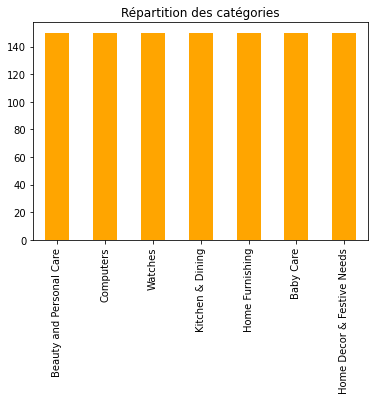

In [21]:
data["product_category_tree"].value_counts().plot(kind='bar', color='orange', title ='Répartition des catégories')

### Ajout de la Polarité et de la fréquence des mots

In [22]:
data['polarity'] = data["Description_clean"].apply(lambda x: TextBlob(x).sentiment.polarity)
data["Word_count"] = data["Description_clean"].apply(lambda x: len(x.split()))

In [23]:
data.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean,polarity,Word_count
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...,0.350976,159
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,Baby Care,BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...,0.118750,68


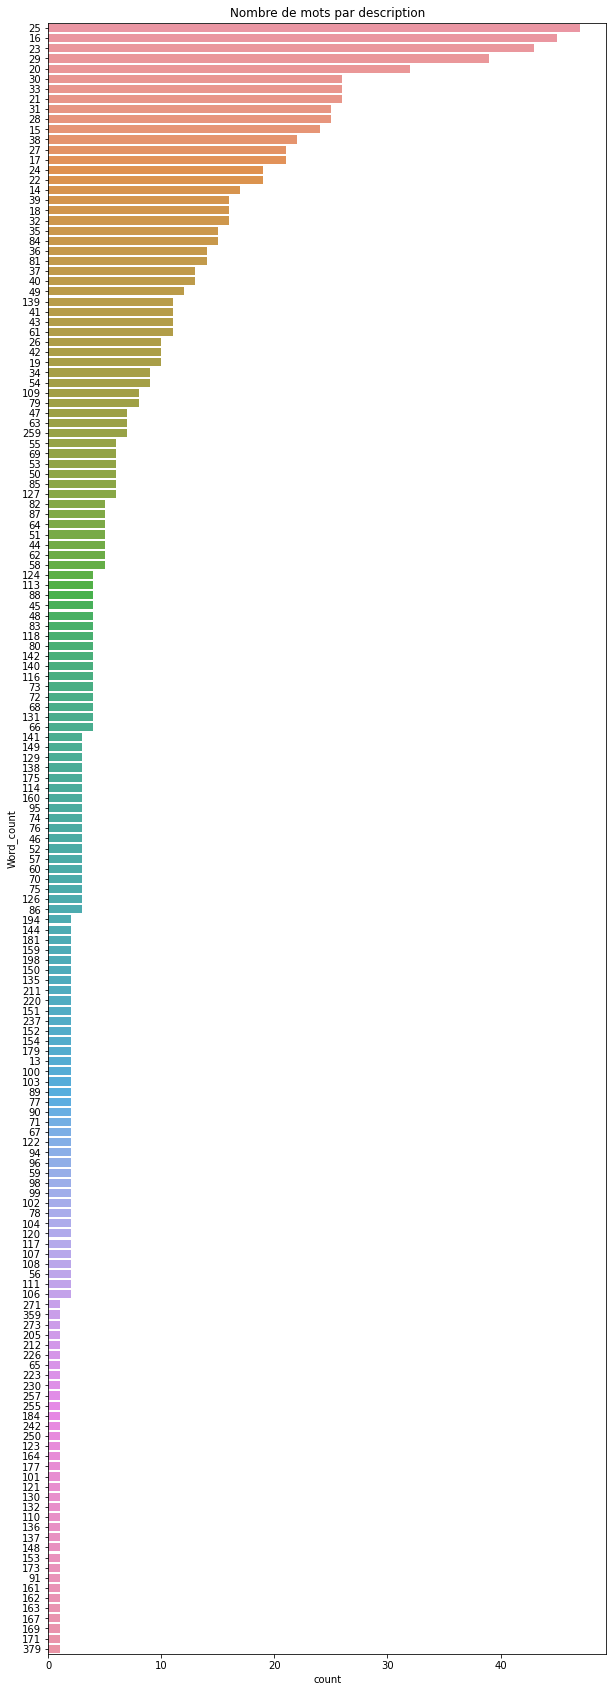

In [24]:
fig,ax = plt.subplots(figsize=(10,30))
label = list(data["Word_count"].value_counts().index.tolist())
sns.countplot(y = "Word_count", data = data, order = label, ax = ax, orient = "h")
plt.title("Nombre de mots par description")
plt.show()

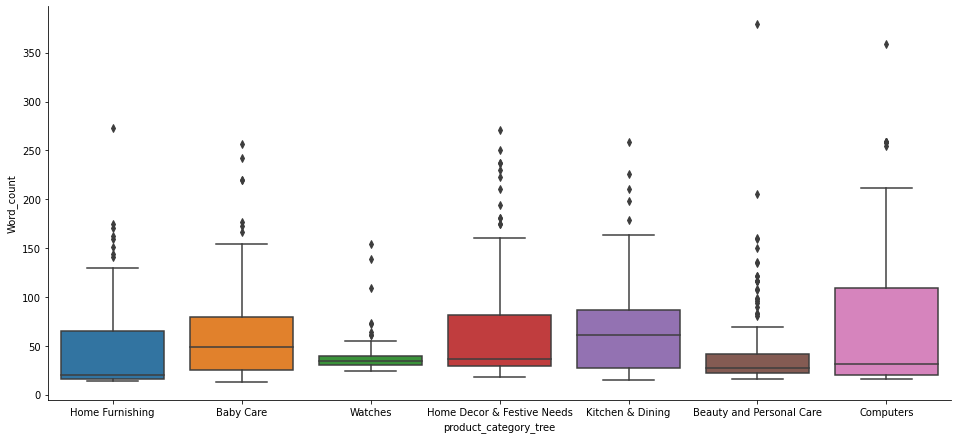

In [25]:
sns.catplot(x = 'product_category_tree', y = 'Word_count', data = data, kind = "box", height=6,aspect=2.2)

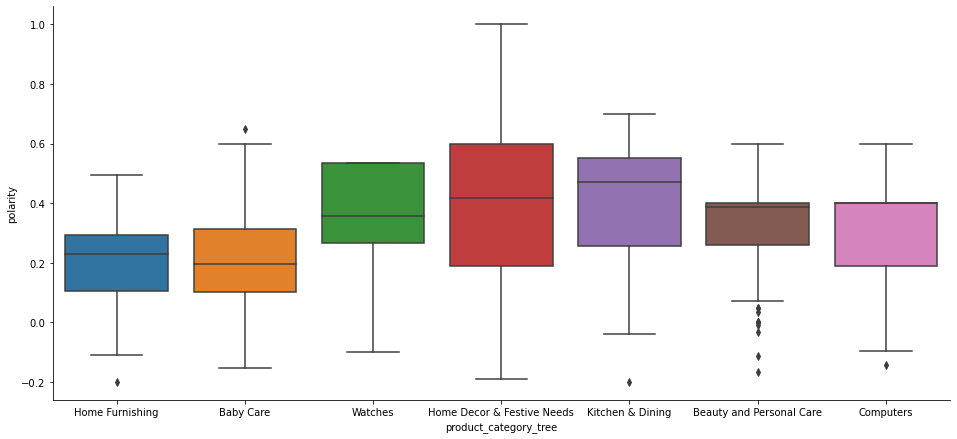

In [26]:
sns.catplot(x = 'product_category_tree', y = 'polarity', data = data, kind = "box", height=6,aspect=2.2)

### Analyse des descriptions par catégorie

In [27]:
data_home = data[data["product_category_tree"] == "Home Furnishing"] 
data_baby = data[data["product_category_tree"] == "Baby Care"] 
data_watche = data[data["product_category_tree"] == "Watches"]
data_decor = data[data["product_category_tree"] == "Home Decor & Festive Needs"]
data_kitchen = data[data["product_category_tree"] == "Kitchen & Dining"] 
data_beauty = data[data["product_category_tree"] == "Beauty and Personal Care"]
data_computer = data[data["product_category_tree"] == "Computers"]

In [28]:
data_cat =    {
        "data_home":data_home,
        "data_baby":data_baby,
        "data_watche":data_watche,
        "data_decor":data_decor,
        "data_kitchen":data_kitchen,
        "data_beauty":data_beauty,
        "data_computer":data_computer
            }

In [29]:
for name, df in data_cat.items():
    print(name,"\n")
    print(get_top_n_words(df["Description_clean"],10))
    print("\n","--"*20)

data_home 

[('cm', 168), ('cover', 100), ('cotton', 99), ('product', 93), ('pack', 88), ('buy', 77), ('design', 76), ('free', 76), ('flipkartcom', 74), ('genuine', 74)]

 ----------------------------------------
data_baby 

[('baby', 316), ('girl', 197), ('cotton', 182), ('detail', 180), ('fabric', 162), ('boy', 112), ('dress', 102), ('ideal', 98), ('general', 96), ('package', 87)]

 ----------------------------------------
data_watche 

[('watch', 349), ('analog', 249), ('men', 158), ('product', 136), ('day', 136), ('buy', 134), ('online', 134), ('india', 134), ('flipkartcom', 134), ('great', 134)]

 ----------------------------------------
data_decor 

[('cm', 283), ('showpiece', 204), ('price', 146), ('product', 130), ('best', 87), ('day', 84), ('free', 83), ('inch', 82), ('buy', 82), ('30', 79)]

 ----------------------------------------
data_kitchen 

[('mug', 445), ('ceramic', 204), ('perfect', 143), ('price', 141), ('product', 129), ('material', 119), ('design', 115), ('coffee'

data_home 



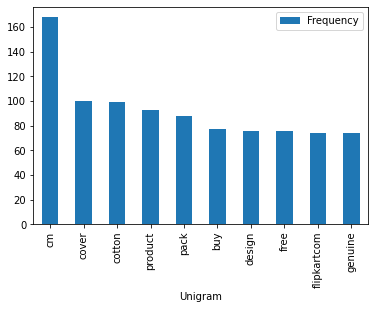


 ----------------------------------------
data_baby 



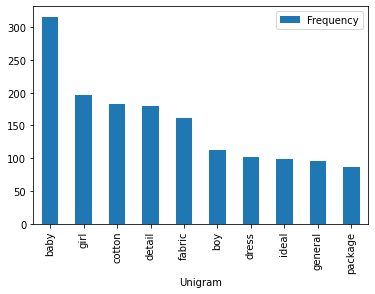


 ----------------------------------------
data_watche 



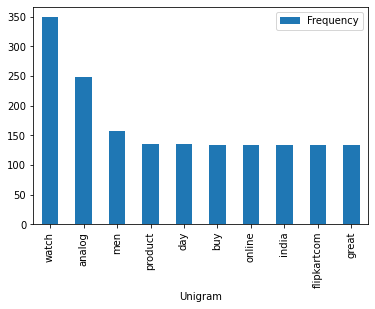


 ----------------------------------------
data_decor 



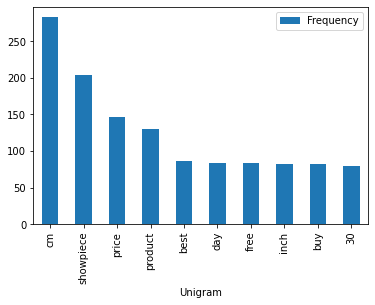


 ----------------------------------------
data_kitchen 



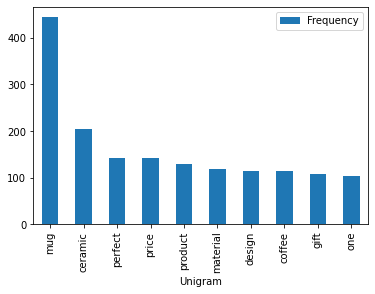


 ----------------------------------------
data_beauty 



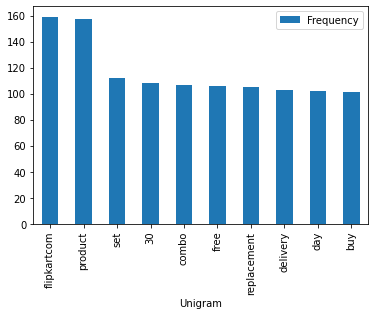


 ----------------------------------------
data_computer 



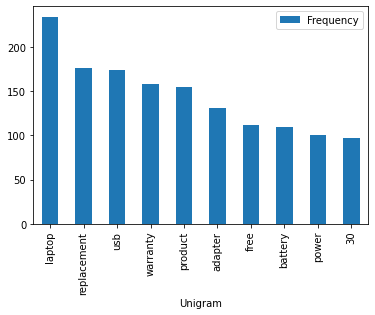


 ----------------------------------------


In [30]:
for name,df in data_cat.items():
    print(name,"\n")
    plot_n_words(df["Description_clean"],10)
    plt.show()
    print("\n","--"*20)

### Type de mots - Tags

In [31]:
blob = TextBlob(str(data["Description_clean"]))

In [32]:
blob.tags

[('0', 'CD'),
 ('key', 'JJ'),
 ('feature', 'NN'),
 ('elegance', 'NN'),
 ('polyester', 'NN'),
 ('multicolor', 'NN'),
 ('abst', 'NN'),
 ('1', 'CD'),
 ('specification', 'NN'),
 ('sathiyas', 'JJ'),
 ('cotton', 'NN'),
 ('bath', 'NN'),
 ('towel', 'NN'),
 ('3', 'CD'),
 ('bat', 'NN'),
 ('2', 'CD'),
 ('key', 'JJ'),
 ('feature', 'NN'),
 ('eurospa', 'VBZ'),
 ('cotton', 'NN'),
 ('terry', 'NN'),
 ('face', 'NN'),
 ('towel', 'NN'),
 ('se', 'NN'),
 ('3', 'CD'),
 ('key', 'JJ'),
 ('feature', 'NN'),
 ('santosh', 'VBZ'),
 ('royal', 'JJ'),
 ('fashion', 'NN'),
 ('cotton', 'NN'),
 ('print', 'NN'),
 ('4', 'CD'),
 ('key', 'JJ'),
 ('feature', 'NN'),
 ('jaipur', 'NN'),
 ('print', 'NN'),
 ('cotton', 'NN'),
 ('floral', 'JJ'),
 ('king', 'NN'),
 ('si', 'NN'),
 ('1045', 'CD'),
 ('oren', 'NN'),
 ('empower', 'CC'),
 ('extra', 'JJ'),
 ('large', 'JJ'),
 ('self', 'NN'),
 ('adhesive', 'JJ'),
 ('sticker', 'NN'),
 ('1046', 'CD'),
 ('wallmantra', 'JJ'),
 ('large', 'JJ'),
 ('vinyl', 'NN'),
 ('sticker', 'NN'),
 ('sticker', 'NN'

Text(0.5, 1.0, 'Repartition des tags')

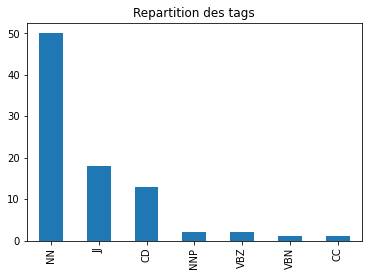

In [33]:
pos_df = pd.DataFrame(blob.tags, columns=['Words',"pos"])
pos_df['pos'].value_counts().plot(kind='bar', x='Pos')
plt.title("Repartition des tags")

### Clustering KMeans selon la description via TFID VECTORIZER

### Récupération Label Originel

In [34]:
labelencoder = LabelEncoder()
data["Label_Category_Original"] = labelencoder.fit_transform(data["product_category_tree"])

In [35]:
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean,polarity,Word_count,Label_Category_Original
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...,0.350976,159,4
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,Baby Care,BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...,0.118750,68,0
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,Baby Care,BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key feature eurospa cotton terry face towel se...,0.080357,167,0


### Application du KMeans via Tfid

In [36]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data["Description_clean"])

true_k = 7
model = KMeans(n_clusters=true_k)
model.fit(X)

data["Label_Description_KMeans_Tfid"] = model.labels_

In [37]:
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,Description_clean,polarity,Word_count,Label_Category_Original,Label_Description_KMeans_Tfid
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...,0.350976,159,4,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,Baby Care,BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...,0.118750,68,0,5
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,Baby Care,BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key feature eurospa cotton terry face towel se...,0.080357,167,0,5


In [38]:
pd.crosstab(data["product_category_tree"], data["Label_Category_Original"], margins=True)

Label_Category_Original,0,1,2,3,4,5,6,All
product_category_tree,,,,,,,,
Baby Care,150,0,0,0,0,0,0,150
Beauty and Personal Care,0,150,0,0,0,0,0,150
Computers,0,0,150,0,0,0,0,150
Home Decor & Festive Needs,0,0,0,150,0,0,0,150
Home Furnishing,0,0,0,0,150,0,0,150
Kitchen & Dining,0,0,0,0,0,150,0,150
Watches,0,0,0,0,0,0,150,150
All,150,150,150,150,150,150,150,1050


In [39]:
pd.crosstab(data["product_category_tree"], data["Label_Description_KMeans_Tfid"], margins=True)

Label_Description_KMeans_Tfid,0,1,2,3,4,5,6,All
product_category_tree,,,,,,,,
Baby Care,14,20,81,1,0,34,0,150
Beauty and Personal Care,20,80,0,0,1,49,0,150
Computers,31,67,0,0,0,52,0,150
Home Decor & Festive Needs,12,0,0,0,71,67,0,150
Home Furnishing,0,74,0,0,0,76,0,150
Kitchen & Dining,49,3,0,54,0,44,0,150
Watches,0,0,0,0,0,3,147,150
All,126,244,81,55,72,325,147,1050


### Comparaison des Labels avec le score de ARI

In [40]:
adjusted_rand_score(data["Label_Category_Original"], data["Label_Description_KMeans_Tfid"])

0.2806697455236986

### Représentation à travers le T-SNE

In [41]:
X_tfk = data[["Description_clean","polarity","Label_Description_KMeans_Tfid"]]

In [42]:
X_tfk.head(3)

,Description_clean,polarity,Label_Description_KMeans_Tfid
0,key feature elegance polyester multicolor abst...,0.350976,5
1,specification sathiyas cotton bath towel 3 bat...,0.118750,5
2,key feature eurospa cotton terry face towel se...,0.080357,5


### Encodage & Standardisation

In [43]:
X_tfk["Description_clean"] = labelencoder.fit_transform(X_tfk["Description_clean"])

<ipython-input-43-8b3643670581>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_tfk["Description_clean"] = labelencoder.fit_transform(X_tfk["Description_clean"])


In [44]:
std_scale = preprocessing.StandardScaler().fit(X_tfk) # Standardisation de nos valeurs + Fit X
X_tfk = std_scale.transform(X_tfk) # Données normalisées 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


<AxesSubplot:title={'center':'Répartition des données après le KMeans en 7'}>

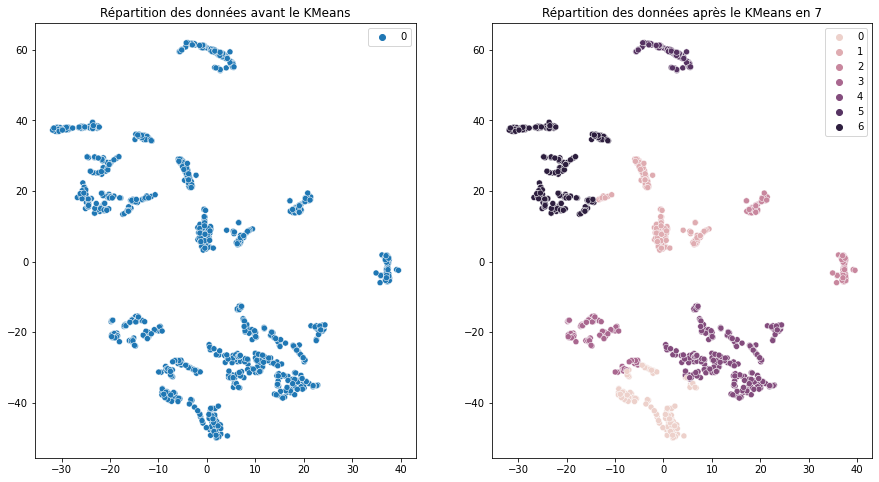

In [45]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_tfk)

plot_km(X_tsne,7)

### Clustering KMeans selon la description via le Doc2Vec

In [46]:
data["Description_clean"]

0       key feature elegance polyester multicolor abst...
1       specification sathiyas cotton bath towel 3 bat...
2       key feature eurospa cotton terry face towel se...
3       key feature santosh royal fashion cotton print...
4       key feature jaipur print cotton floral king si...
                              ...                        
1045    oren empower extra large self adhesive sticker...
1046    wallmantra large vinyl sticker sticker pack 1 ...
1047    buy uberlyfe extra large pigmented polyvinyl f...
1048    buy wallmantra medium vinyl sticker sticker rs...
1049    buy uberlyfe large vinyl sticker rs595 online ...
Name: Description_clean, Length: 1050, dtype: object

In [47]:
tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data["Description_clean"])]

In [48]:
tagged_data

[TaggedDocument(words=['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtainelegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'r', '899', 'curtain', 'enhances', 'look', 'interiorsthis', 'curtain', 'made', '100', 'high', 'quality', 'polyester', 'fabricit', 'feature', 'eyelet', 'style', 'stitch', 'metal', 'ringit', 'make', 'room', 'environment', 'romantic', 'lovingthis', 'curtain', 'ant', 'wrinkle', 'anti', 'shrinkage', 'elegant', 'apparancegive', 'home', 'bright', 'modernistic', 'appeal', 'design', 'surreal', 'attention', 'sure', 'steal', 'heart', 'contemporary', 'eyelet', 'valance', 'curtain', 'slide', 'smoothly', 'draw', 'apart', 'first', 'thing', 'morning', 'welcome', 'bright', 'sun', 'ray', 'want', 'wish', 'good', 'morning', 'whole', 'world', 'draw', 'close', 'evening', 'create', 'special', 'moment', 'joyous', 'beauty', 'given', 'soothing', 'print'

### Application du KMeans via D2V

In [49]:
d2v = Doc2Vec(tagged_data,vector_size = 100, window = 10, min_count = 5, workers=4)
d2v.train(tagged_data, total_examples=d2v.corpus_count, epochs=30)

X = d2v.docvecs.vectors

true_k = 7
model = KMeans(n_clusters=true_k)
model.fit(X)

data["Label_Description_KMeans_Doc2Vec"] = model.labels_

<ipython-input-49-a3a3c3a6287d>:4: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  X = d2v.docvecs.vectors


In [50]:
data.head(3)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,product_rating,overall_rating,brand,product_specifications,Description_clean,polarity,Word_count,Label_Category_Original,Label_Description_KMeans_Tfid,Label_Description_KMeans_Doc2Vec
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,Home Furnishing,CRNEG7BKMFFYHQ8Z,1899.000000,899.000000,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",key feature elegance polyester multicolor abst...,0.350976,159,4,5,5
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,Baby Care,BTWEGFZHGBXPHZUH,600.000000,449.000000,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",specification sathiyas cotton bath towel 3 bat...,0.118750,68,0,5,2
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,Baby Care,BTWEG6SHXTDB2A2Y,2186.197331,1584.527169,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",key feature eurospa cotton terry face towel se...,0.080357,167,0,5,0


In [51]:
pd.crosstab(data["product_category_tree"], data["Label_Description_KMeans_Doc2Vec"], margins=True)

Label_Description_KMeans_Doc2Vec,0,1,2,3,4,5,6,All
product_category_tree,,,,,,,,
Baby Care,5,46,90,1,1,2,5,150
Beauty and Personal Care,21,103,20,2,2,1,1,150
Computers,0,90,28,21,0,11,0,150
Home Decor & Festive Needs,1,79,28,0,28,12,2,150
Home Furnishing,4,83,37,0,1,14,11,150
Kitchen & Dining,1,57,21,1,2,68,0,150
Watches,0,98,51,1,0,0,0,150
All,32,556,275,26,34,108,19,1050


### Comparaison des scores de ARI

In [52]:
adjusted_rand_score(data["Label_Category_Original"], data["Label_Description_KMeans_Doc2Vec"])

0.0479300070965124

In [53]:
adjusted_rand_score(data["Label_Description_KMeans_Tfid"], data["Label_Description_KMeans_Doc2Vec"])

0.141746781679962

### Représentation via le TSNE

In [54]:
X_d2vk = data[["Description_clean","polarity","Label_Description_KMeans_Doc2Vec"]]
X_d2vk["Description_clean"] = labelencoder.fit_transform(X_d2vk["Description_clean"])

<ipython-input-54-410442a6b067>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_d2vk["Description_clean"] = labelencoder.fit_transform(X_d2vk["Description_clean"])


In [55]:
std_scale = preprocessing.StandardScaler().fit(X_d2vk) # Standardisation de nos valeurs + Fit X
X_d2vk = std_scale.transform(X_d2vk) # Données normalisées 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


<AxesSubplot:title={'center':'Répartition des données après le KMeans en 7'}>

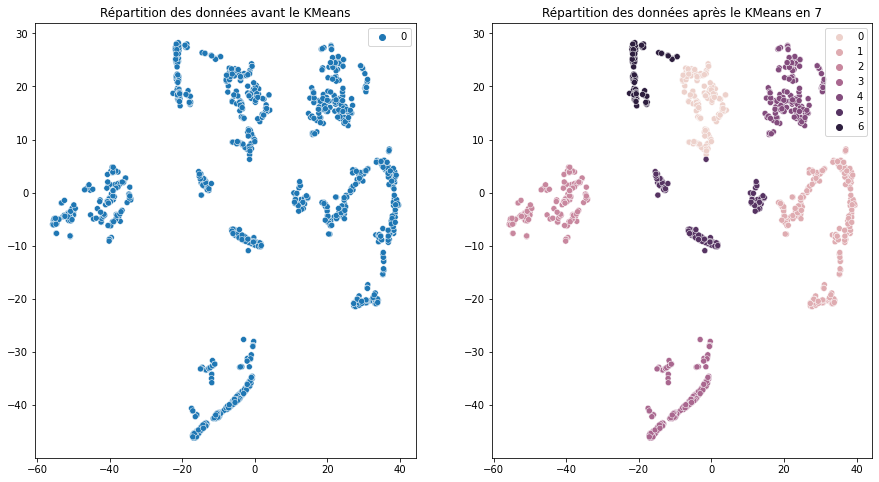

In [56]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_d2vk)

plot_km(X_tsne,7)

### Prédiction d'une catégorie à partir de la colonne description

In [57]:
# Indpdt and Dpdt variables

IV_train, IV_test, DV_train, DV_test = train_test_split(data["Description_clean"], data["product_category_tree"], test_size = 0.2)

print(IV_train.shape)
print(DV_train.shape)
print(IV_test.shape)
print(DV_test.shape)

(840,)
(840,)
(210,)
(210,)


In [58]:
IV_train

616    key feature pokizo baby girl aline dress multi...
106    buy bestway 147m x 147m x 122mplay sun shade i...
947    buy eshoppee shiv face antique color brass ido...
696    tallenge christmas collection nativity art gal...
607    key feature aapno rajasthan lovely jewellery v...
                             ...                        
956    key feature bhalaria dessert fork stainless st...
209    buy port interiordesign showpiece 16 cm rs1699...
752    buy rajasthan craft abstract single quilt comf...
11     cartier w6701005 analog watch boy men buy cart...
200    design hut showpiece 8 cm brass yellow price r...
Name: Description_clean, Length: 840, dtype: object

In [59]:
DV_train

616                     Baby Care
106                     Baby Care
947    Home Decor & Festive Needs
696    Home Decor & Festive Needs
607      Beauty and Personal Care
                  ...            
956              Kitchen & Dining
209    Home Decor & Festive Needs
752               Home Furnishing
11                        Watches
200    Home Decor & Festive Needs
Name: product_category_tree, Length: 840, dtype: object

### Modèle de prédiction (via TFID & Regression Logistique)

In [60]:
# Regroupe les documents en mots unique - Donne une position à chaque mot avec Vocabulary - La fréquence dans un second temps avec fit_transfo
tvec = TfidfVectorizer() 
clf2 = LogisticRegression(solver='lbfgs')

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

pred = model.predict(IV_test)

In [61]:
print("Accuracy :", accuracy_score(pred, DV_test))
print("Precision :", precision_score(pred, DV_test, average= 'weighted'))
print("Recall :", recall_score(pred, DV_test, average= 'weighted'))

Accuracy : 0.9238095238095239
Precision : 0.933866986126441
Recall : 0.9238095238095239


### Test sur de nouvelles descriptions

In [62]:
test = ["I found this wall very beaytiful"]

result = model.predict(test)

print(result)

['Home Decor & Festive Needs']


In [63]:
test = ["I found this phone very beaytiful"]

result = model.predict(test)

print(result)

['Computers']


In [64]:
test = ["I found this green fork usefull"]

result = model.predict(test)

print(result)

['Kitchen & Dining']


In [65]:
data.to_csv(r'D:\OC\Projet_6\Projet_6_data.csv', index = True)